<a href="https://colab.research.google.com/github/gabrieldepaiva/Projetos_Financas-Python/blob/main/Analise_Carteira_de_Acoes_Pessoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das Bibliotecas Necessárias

In [1]:
#@title
import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
from google.colab.data_table import DataTable
print('Pacotes Necessários Carregados com Sucesso')

Pacotes Necessários Carregados com Sucesso


## Escolha dos ativos que compõem a carteira

In [2]:
#@title
print('Pesquisa rápida de cada código das ações das empresas listadas na bolsa de valores')
DataBase = pd.read_csv('https://raw.githubusercontent.com/gabrieldepaiva/Projetos_Financas-Python/main/Tickers.csv',sep=';')
DataTable(DataBase,include_index=False,num_rows_per_page=5)

Pesquisa rápida de cada código das ações das empresas listadas na bolsa de valores


,Empresa,Ticker
0,AES Tiete Energia SA Brazilian Units,TIET11.SA
1,AF Invest FII - Recebiveis Imobiliarios,AFCR11.SA
2,Aliansce Sonae Shopping Centers SA,ALSO3.SA
3,Alianza Trust Renda Imobiliaria FII,ALZR11.SA
4,Alpargatas SA,ALPA3.SA
...,...,...
398,XP Log Fundo de Investimento Imobiliario-FII,XPLG11.SA
399,XP Malls Fundo de Investimento Imobiliario,XPML11.SA
400,XP Properties FII - FII,XPPR11.SA
401,Xp Selection Fundo de Fundos Inv Imob Fii,XPSF11.SA


In [4]:
#@title
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:')
print('')

# Código Base para incluir os ativos na carteira
opcao = 1
carteira = []

carteira.append(input('Digite o nome do ativo. - '))
opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))

while True:
  if opcao == 1:
    carteira.append(input('Digite o nome do ativo. - '))
    opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))
  elif opcao != 1 and opcao != 2:
    opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
  else:
    break

print('')
print(f'Sua carteira é composta pelos seguintes ativos: {carteira}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:

Digite o nome do ativo. - BBAS3.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. - BEES3.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. - GOLD11.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. - ITSA4.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. - MXRF11.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. - TAEE11.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 2

Sua carteira é composta pelos seguintes ativos: ['BBAS3.SA', 'BEES3.SA', 'GOLD11.SA', 'ITSA4.SA', 'MXRF11.SA', 'TAEE11.SA']


## Atribuindo os Pesos para esses Ativos

In [6]:
#@title
lista = [carteira]

pesos = []

try:
  for loc, ativo in enumerate(carteira):
    pesos.append(float(input(f'Escreva o peso do ativo {carteira[loc]} (somente o número) - '))/100)
except:
  print('')
  print('\033[31mO valor digitado resultou em um erro.\033[m')
  print('Favor executar esta célula novamente!')

# pode ser que não precise dessa parte do código
else:
  if sum(pesos) != 1:
    print('')
    print(f'\033[31mA soma dos pesos resultou em {sum(pesos)*100}%, a soma deve ser 100%!\033[31m')
    print('Favor executar esta célula novamente!')

Escreva o peso do ativo BBAS3.SA (somente o número) - 14.31
Escreva o peso do ativo BEES3.SA (somente o número) - 8.62
Escreva o peso do ativo GOLD11.SA (somente o número) - 13.36
Escreva o peso do ativo ITSA4.SA (somente o número) - 26.97
Escreva o peso do ativo MXRF11.SA (somente o número) - 9.10
Escreva o peso do ativo TAEE11.SA (somente o número) - 27.64


## Importação da base de dados com as cotações diárias do Yahoo Finance

In [7]:
#@title
inicio = input('A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> ')
fim = input('Até qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> ')

BaseDados = pd.DataFrame()

for acao in carteira:
  BaseDados[acao] = data.DataReader(acao, data_source = 'yahoo',start = inicio,end = fim)['Adj Close']

print('')
print('Importação dos dados realizada com sucesso!')

A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> 2021-01-01
Até qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> 2021-02-12

Importação dos dados realizada com sucesso!


##### Resultado da tabela que foi gerada de forma parcial

In [8]:
#@title
# Resultado da tabela que foi gerada parcialmente
BaseDados.head()

,BBAS3.SA,BEES3.SA,GOLD11.SA,ITSA4.SA,MXRF11.SA,TAEE11.SA
Date,,,,,,
2021-01-04,37.590000,5.609594,NaN,11.527797,10.46,33.000000
2021-01-05,37.200001,5.460138,NaN,11.437970,10.45,33.060001
2021-01-06,38.049999,5.460138,NaN,11.667527,10.46,33.119999
2021-01-07,39.560001,5.450174,NaN,12.136623,10.46,32.150002
2021-01-08,39.540001,5.460138,NaN,12.106682,10.47,32.849998


## Inclusão da coluna com o retorno diário da carteira 

In [9]:
#@title
# Retorno acumulado de cada ação

retorno_acumulado = ((BaseDados/BaseDados.iloc[0])-1)*100

##### Tabela gerada com os resultados consolidados

In [10]:
#@title
w = np.array(pesos)

ValorTotal = (retorno_acumulado * w)
ValorTotal['Retorno'] = ValorTotal.sum(axis=1)
ValorTotal.tail()

,BBAS3.SA,BEES3.SA,GOLD11.SA,ITSA4.SA,MXRF11.SA,TAEE11.SA,Retorno
Date,,,,,,,
2021-02-08,-1.416154,-0.598672,NaN,-2.170638,0.191396,-0.167516,-4.161583
2021-02-09,-1.260072,-0.706237,NaN,-1.960079,0.226195,-0.159138,-3.859331
2021-02-10,-1.438994,-0.813803,NaN,-2.123847,0.217495,-0.376910,-4.536059
2021-02-11,-1.389506,-0.783070,NaN,-2.077055,0.234894,-0.410414,-4.425150
2021-02-12,-1.488484,-0.752337,NaN,-2.264220,0.252294,-0.477418,-4.730164


## Escolha dos Benchmarks

In [11]:
#@title
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC')
print('')

benchmarks = []

q = 's'

q = input('Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - ')
if q == 's':

  # inclusão dos benchmarks
  escolha = 1

  benchmarks.append(input('Digite o código do benchmark. - '))
  escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))

  while True:
    if escolha == 1:
      benchmarks.append(input('Digite o nome do benchmark. - '))
      escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))
    elif opcao != 1 and opcao != 2:
      opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
    else:
      break

  print('')
  print(f'Os seguintes benchmarks foram incluídos : {benchmarks}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC

Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - s
Digite o código do benchmark. - ^BVSP
Deseja adicionar outro? [1] Sim / [2] Não - 2

Os seguintes benchmarks foram incluídos : ['^BVSP']


##### Importação dos dados dos benchmarks que foram escolhidos

In [12]:
#@title
#Os dados referentes aos benchmarks escolhidos serão importados para posterior análise

BaseDados2 = pd.DataFrame()

for indice in benchmarks:
  BaseDados2[indice] = data.DataReader(indice, data_source = 'yahoo',start = inicio)['Adj Close']

bmk_var_acum = ((BaseDados2/BaseDados2.iloc[0])-1)*100

print('Importação dos dados realizada com sucesso!')

Importação dos dados realizada com sucesso!


### Criação da Tabela Carteira X Benchmarks

In [13]:
#@title
# Criação da tabela com o retorno acumulado da carteira e dos benchmarks selecionados

tabela_final = pd.DataFrame()

tabela_final['Sua Carteira'] = ValorTotal['Retorno']

for i in benchmarks:
  tabela_final[i] = bmk_var_acum[i]

##### Resultado da tabela criada

In [14]:
#@title
tabela_final.head()

,Sua Carteira,^BVSP
Date,,
2021-01-04,0.000000,0.000000
2021-01-05,-0.546729,0.560907
2021-01-06,0.372870,1.090605
2021-01-07,1.217429,2.866108
2021-01-08,1.750077,5.601478


## Visualizações e Análises dos Dados Importados e Normalizados

##### Visualização dos ativos que compõem a carteira

Qual foi o valor investido? - 250



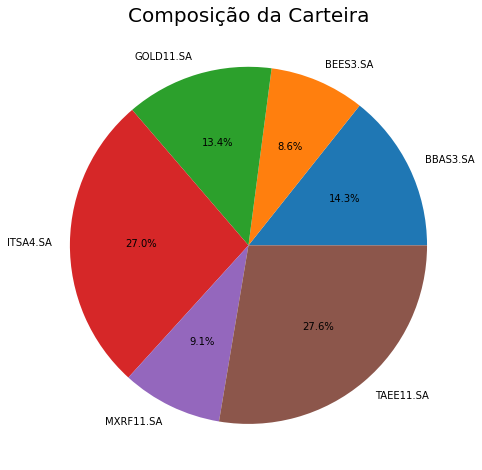

In [15]:
#@title
# Visualização da Representatividade na carteira
listafinal = []

valorinvestido = int(input('Qual foi o valor investido? - '))

for numero in pesos:
  listafinal.append(numero * valorinvestido)

listafinal

x_list = listafinal
labels_list = carteira
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.pie(x_list,autopct='%1.1f%%',labels=labels_list)
plt.title('Composição da Carteira',size=20)
print('')

##### Visualização das variações da carteira e benchmarks acumulados

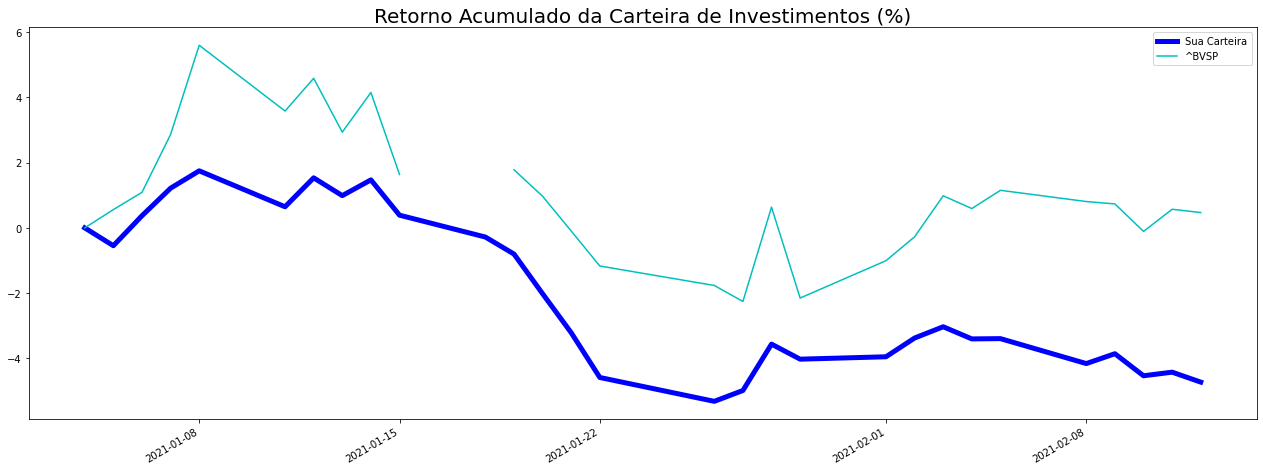

In [26]:
#@title
# Visualização das variações da carteira e benchmarks acumulados
cores = ['c','#368B8B','#276666','#276666','#0FA7A7']

tabela_final['Sua Carteira'].plot(color='b',LineWidth=5,figsize=(22,8))
for loc,j in enumerate(benchmarks):
  tabela_final[j].plot(color=cores[loc])
plt.legend()
plt.title ('Retorno Acumulado da Carteira de Investimentos (%)',size=20)
plt.xlabel('')
plt.ylabel('')
print('')

##### Lista de Resultados da carteira analisada

In [25]:
#@title
BaseDados['Soma'] = BaseDados.sum(axis=1)

ret_cart = BaseDados['Soma'].pct_change().mean()*100
risco_cart = BaseDados['Soma'].pct_change().std()*100
linhas = BaseDados['Soma'].pct_change().count()
ret_acum_cart = tabela_final['Sua Carteira'].iloc[linhas]

print(f'Variação diária média da carteira: {round(ret_cart,2)}% a.p.')
print(f'Valor do patrimônio da carteira: {round(valorinvestido*(1+(ret_acum_cart/100)),2)}')
print(f'Retorno acumulado da carteira: {round(ret_acum_cart,2)}% a.p.')
print(f'Risco da carteira: {round(risco_cart,2)}% a.p')
if q == 's':
  if '^BVSP' in tabela_final:
    ret_acum_ibov = tabela_final['^BVSP'].iloc[linhas]
    dci = round(((ret_acum_cart/ret_acum_ibov)-1)*100,2)
    print(f'Desempenho em relação ao Ibovespa: {dci}%.')
  else:
    print('')

Variação diária média da carteira: 0.2% a.p.
Valor do patrimônio da carteira: 238.17
Retorno acumulado da carteira: -4.73% a.p.
Risco da carteira: 2.29% a.p
Desempenho em relação ao Ibovespa: -1105.02%.
